In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import joblib

# Data analysis and normalization

In [44]:
df = pd.read_csv('../raw_data/primeira_extracao.csv')

In [45]:
df

,Campaign Name,Reach (Estimated),Date,CPC (Cost per Click),CTR (Clickthrough Rate),CPM (Cost per 1000 Impressions),Action Post Engagement,Cost Per Action Link Clicks,Frequency,Action Landing Page View,"Spend (Cost, Amount Spent)"
0,GTX | CZ_PP_YR_A1 | Vendas | Frio | [19/10] - ...,4049,2023-08-09,"1,067699","2,422294","25,862808",1314.0,"1,65274","1,152136",66.0,"120,65"
1,GTX | CZ_PP_YR_A1 | Vendas | Frio | [19/10] - ...,2519,2023-10-03,"1,847813","2,165088","40,006766",750.0,"2,815714","1,173482",27.0,"118,26"
2,GTX | CZ_PP_YR_A1 | Vendas | Frio | [19/10] - ...,4996,2023-08-27,"0,930809","2,344828","21,825862",1391.0,"1,332526","1,160929",77.0,"126,59"
3,GTX | CZ_PP_YR_A1 | Vendas | Frio | [19/10] - ...,3105,2023-09-20,"1,386588","2,273335","31,521797",803.0,"2,266538","1,204187",38.0,"117,86"
4,GTX | CZ_PP_YR_A1 | Vendas | Frio | [19/10] - ...,2727,2023-10-04,"1,602917","2,229793","35,741716",751.0,"2,508913","1,184085",31.0,"115,41"
...,...,...,...,...,...,...,...,...,...,...,...
1044,Vinicius | CZ_PP_YR_A1 | Vendas | CONV | QUENT...,60,2023-05-29,"9,535","1,190476","113,511905",2.0,"19,07","2,8",1.0,"19,07"
1045,Vinicius | CZ_PP_YR_A1 | Vendas | CONV | QUENT...,80,2023-06-30,"3,665","2,547771","93,375796",3.0,"7,33","1,9625",2.0,"14,66"
1046,Vinicius | CZ_PP_YR_A1 | Vendas | CONV | QUENT...,61,2023-05-28,"11,285","1,273885","143,757962",4.0,"11,285","2,57377",1.0,"22,57"
1047,Vinicius | CZ_PP_YR_A1 | Vendas | CONV | QUENT...,80,2023-05-14,"5,3575","1,746725","93,580786",3.0,"7,143333","2,8625",2.0,"21,43"


In [4]:
df.dtypes

Campaign Name                       object
Reach (Estimated)                    int64
Date                                object
CPC (Cost per Click)                object
CTR (Clickthrough Rate)             object
CPM (Cost per 1000 Impressions)     object
Action Post Engagement             float64
Cost Per Action Link Clicks         object
Frequency                           object
Action Landing Page View           float64
Spend (Cost, Amount Spent)          object
dtype: object

In [31]:
df['date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [88]:
df['spend'] = df['spend'].str.replace(',', '.').astype('float')

In [ ]:
columns_dict = {
    'Nome da Campanha': 'Campaign Name',
    'Alcance (Estimado)': 'Reach (Estimated)',
    'Data (Dia)': 'Date',
    'CPC - Custo por Clique':'CPC (Cost per Click)',
    'CTR - Clickthrough Rate': 'CTR (Clickthrough Rate)',
    
}

In [66]:
colunas_ls = ['CPC (Cost per Click)',
 'CTR (Clickthrough Rate)',
 'CPM (Cost per 1000 Impressions)',
 'Cost Per Action Link Clicks',
 'Frequency']

In [67]:
for col in colunas_ls:
    df[col] = df[col].str.replace(',', '.').astype('float')

In [22]:
.df['Campaign Name'].nunique()

20

In [112]:
df.corr()

,Reach (Estimated),CPC (Cost per Click),CTR (Clickthrough Rate),CPM (Cost per 1000 Impressions),Action Post Engagement,Cost Per Action Link Clicks,Frequency,Action Landing Page View,spend
Reach (Estimated),1.000000,-0.309958,0.085114,-0.341386,0.931409,-0.378283,-0.330763,0.900271,0.923256
CPC (Cost per Click),-0.309958,1.000000,-0.459700,0.730567,-0.313607,0.798008,0.577470,-0.328083,-0.211062
CTR (Clickthrough Rate),0.085114,-0.459700,1.000000,-0.043524,0.170872,-0.438853,-0.081954,0.289112,0.067328
CPM (Cost per 1000 Impressions),-0.341386,0.730567,-0.043524,1.000000,-0.319379,0.613530,0.732801,-0.295745,-0.183535
Action Post Engagement,0.931409,-0.313607,0.170872,-0.319379,1.000000,-0.394983,-0.335177,0.952229,0.837663
Cost Per Action Link Clicks,-0.378283,0.798008,-0.438853,0.613530,-0.394983,1.000000,0.598262,-0.406170,-0.291333
Frequency,-0.330763,0.577470,-0.081954,0.732801,-0.335177,0.598262,1.000000,-0.297102,-0.266756
Action Landing Page View,0.900271,-0.328083,0.289112,-0.295745,0.952229,-0.406170,-0.297102,1.000000,0.812190
spend,0.923256,-0.211062,0.067328,-0.183535,0.837663,-0.291333,-0.266756,0.812190,1.000000


<AxesSubplot:xlabel='date'>

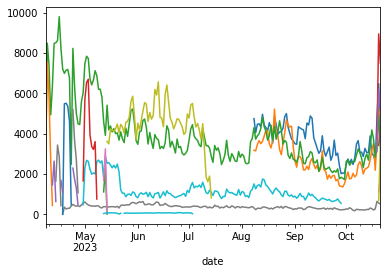

In [21]:
df.groupby(['date','Campaign Name'])\
.agg({'Reach (Estimated)':'sum'})\
.reset_index()\
.pivot_table(index='date', columns='Campaign Name').plot(legend=False)

# Data cleanse for dash import

In [13]:
def data_proc(data_inicio, data_fim):
    '''
    data_inicio = str
    data_fim = str
    '''
    df = pd.read_csv('../raw_data/primeira_extracao.csv')

    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

    teste = df.groupby(['date','Campaign Name'])\
    .agg({'Reach (Estimated)':'sum'})\
    .reset_index()\
    .pivot_table(index='date', columns='Campaign Name')

    # Definindo as datas de início e fim para o período desejado
    data_inicio = pd.to_datetime(data_inicio)
    data_fim = pd.to_datetime(data_fim)

    # Filtrando o DataFrame entre as datas de início e fim
    df_filtrado = df.loc[(df['Data'] >= data_inicio) & (df['Data'] <= data_fim)]
    
    teste.to_json('teste.json')

In [46]:
df.rename(columns={'Spend (Cost, Amount Spent)': 'spend'},inplace=True)

In [51]:
list(df.columns)

['Campaign Name',
 'Reach (Estimated)',
 'Date',
 'CPC (Cost per Click)',
 'CTR (Clickthrough Rate)',
 'CPM (Cost per 1000 Impressions)',
 'Action Post Engagement',
 'Cost Per Action Link Clicks',
 'Frequency',
 'Action Landing Page View',
 'spend']

In [57]:
colunas = ['Reach (Estimated)',
  'CPC (Cost per Click)',
 'CTR (Clickthrough Rate)',
 'CPM (Cost per 1000 Impressions)',
 'Action Post Engagement',
 'Cost Per Action Link Clicks',
 'Frequency',
 'spend']

In [62]:
df.dtypes

Campaign Name                       object
Reach (Estimated)                    int64
Date                                object
CPC (Cost per Click)                object
CTR (Clickthrough Rate)             object
CPM (Cost per 1000 Impressions)     object
Action Post Engagement             float64
Cost Per Action Link Clicks         object
Frequency                           object
Action Landing Page View           float64
spend                               object
dtype: object

In [66]:
colunas_ls = ['CPC (Cost per Click)',
 'CTR (Clickthrough Rate)',
 'CPM (Cost per 1000 Impressions)',
 'Cost Per Action Link Clicks',
 'Frequency']

In [67]:
for col in colunas_ls:
    df[col] = df[col].str.replace(',', '.').astype('float')

# XGboost Model for investment forecasting

In [106]:
X, y = df[colunas], df['Action Landing Page View']

In [107]:
df.dropna(inplace=True)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01
}

In [109]:
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 1.0638


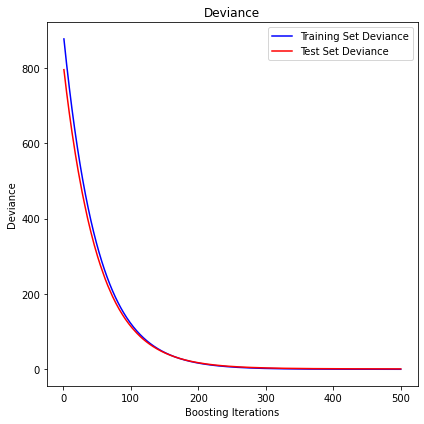

In [111]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()